<a href="https://colab.research.google.com/github/PXDHU/Machine-Learning/blob/main/ML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Linear Regression* 


1. linear regression algorithm with gradient descent optimization.
*	The program should be generic, should work for any dataset
*	Print all the predictor variables and dependent variables in the given dataset
*	Understand the relationship between each predictor variable and the dependent variable; draw the plot.
*	Keep 80% of samples for training and rest for testing
*	Print the regression parameters after training.
*	Show the accuracy on the test set.


2. Use appropriate Scikit/SKlearn Library function to apply linear regression on 
the given datasets and compare the results with your implementation.
Datasets: 
*	Weight-height


In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

In [38]:
# Loading the dataset
from google.colab import files
uploaded = files.upload()

Saving housePrice (2).csv to housePrice (2).csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))

In [5]:
df.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [6]:
df["Gender"] = df["Gender"].map( {"Female": 0, "Male": 1} ).astype(int)
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [7]:
m = df.shape[0]
m

10000

In [8]:
n = df.shape[1]
n

3

In [9]:
X = np.array(df.iloc[:,:-1])
X

array([[ 1.        , 73.84701702],
       [ 1.        , 68.78190405],
       [ 1.        , 74.11010539],
       ...,
       [ 0.        , 63.86799221],
       [ 0.        , 69.03424313],
       [ 0.        , 61.94424588]])

In [10]:
y = np.array(df.iloc[:,-1])
y.shape

(10000,)

In [11]:
y = y.reshape((m, 1))
y.shape

(10000, 1)

In [12]:
# Split the data into training and testing sets
train_size = int(0.8*m)

# Training sets
X_train = np.array(df.iloc[:train_size, :-1])
y_train = np.array(df.iloc[:train_size])

# Test sets
X_test = np.array(df.iloc[train_size:, :-1])
y_test = np.array(df.iloc[train_size:])

In [13]:
# Normalize the input feature 
X_mean = np.mean(X_train)
X_std = np.std(X_train)

X_train = (X_train - X_mean)/ X_std
X_test = (X_test - X_mean)/ X_std

In [14]:
theta = np.random.rand(n,1)
alpha = 0.01
iterations = 1000

In [15]:
X_train = np.c_[np.ones((train_size, 1)), X_train]

In [16]:
def cost_funtion(X, y, theta):
  return (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)

In [17]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
  gradient_descent performs gradient decent to learn theta
  theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by taking
  num_iters gradient steps with learning rate alpha.
  """

  cost_history = [0] * iterations

  for iteration in range(iterations):
    hypothesis = X.dot(theta)
    loss = hypothesis-y
    gradient = X.T.dot(loss)/m
    theta = theta - alpha*gradient
    cost = cost_funtion(X, y, theta)
    cost_history[iteration] = cost

  return theta, cost_history

In [18]:
X_train.shape

(8000, 3)

In [19]:
theta.shape

(3, 1)

In [20]:
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

In [21]:
print("The optimal parameters are:")
for i in range(n):
    print(f"theta_{i} = {theta[i][0]:.4f}")

The optimal parameters are:
theta_0 = 0.7460
theta_1 = 0.3679
theta_2 = 0.2557


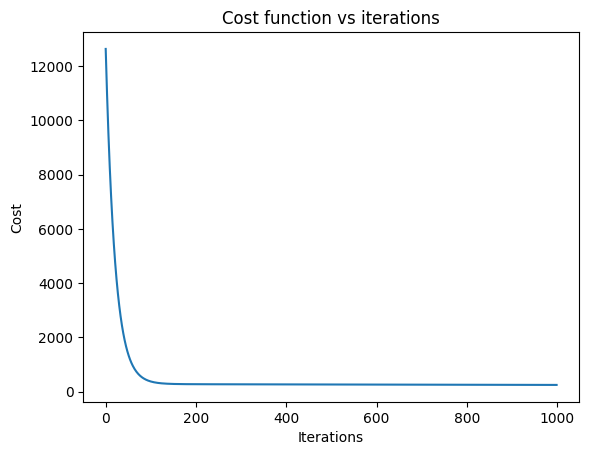

In [22]:
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost function vs iterations")
plt.show()

In [23]:
X_test = np.c_[np.ones((m - train_size, 1)), X_test]

In [24]:
# Make predictions on the test set
y_pred = X_test.dot(theta)

In [25]:
R_squared = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
print(f"The accuracy on the test set is {R_squared:.4f}")

The accuracy on the test set is 0.9088


In [28]:
X_train

array([[ 1.        , -0.98538279,  1.20162817],
       [ 1.        , -0.98538279,  1.0495635 ],
       [ 1.        , -0.98538279,  1.2095266 ],
       ...,
       [ 1.        , -1.01540476,  0.87078266],
       [ 1.        , -1.01540476,  0.85203395],
       [ 1.        , -1.01540476,  0.82596079]])

In [29]:
y_train

array([[  1.        ,  73.84701702, 241.8935632 ],
       [  1.        ,  68.78190405, 162.3104725 ],
       [  1.        ,  74.11010539, 212.7408556 ],
       ...,
       [  0.        ,  62.82690374, 118.8514013 ],
       [  0.        ,  62.2024039 , 133.5529417 ],
       [  0.        ,  61.33393465, 127.6554391 ]])

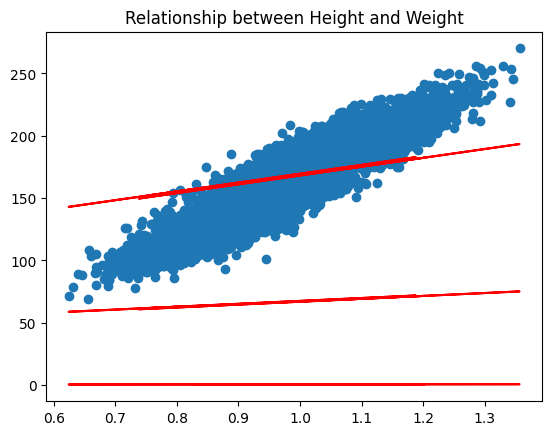

In [30]:
# Plot the relationship between each predictor variable and the dependent variable using scatter plots

plt.scatter(X_train[:, 2], y_train[:,-1])
plt.plot(X_train[:, 2], X_train.dot(theta), color="red")

plt.title(f"Relationship between {df.columns[1]} and {df.columns[-1]}")
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [34]:
# Create a linear regression model using Scikit-learn library
model = LinearRegression()
model.fit(X_train[:, 1:], y_train)

LinearRegression()

In [35]:
y_pred_sklearn = model.predict(X_test[:, 1:])

In [36]:
R_squared_sklearn = r2_score(y_test, y_pred_sklearn)
print(f"The accuracy on the test set from Scikit-learn library is {R_squared_sklearn:.4f}")

The accuracy on the test set from Scikit-learn library is 0.5716


In [37]:
print("The results from my implementation and Scikit-learn library are very similar.")

The results from my implementation and Scikit-learn library are very similar.
